In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from time import time

from scipy import stats
import patsy



# load datasest

In [346]:
#using gene id, since name might same， and make sure use trainning set
df_train = pd.read_csv('train_genelevel_90%.tsv', sep='\t',index_col=0)
#df.set_index(df["Unnamed: 0"], inplace=True)
df_train.shape # (58051, 407)

(58051, 407)

# Normalize across the column (by patient)

In [347]:
## get the sum for the column
sum_col = df_train.sum(axis=0)
sum_col.head()

205_2    11697106.43
251_1    11783975.86
474_3    11846184.23
178_4    14189428.69
313_1    11110747.34
dtype: float64

In [348]:
## sum across the column, then divide by each library depth
new_df = df_train.div(df_train.sum(axis=0), axis=1)
new_df.head()

205_2         251_1         474_3         178_4  \
ENSG00000000003  2.333911e-05  1.629331e-05  1.435061e-05  1.106458e-05   
ENSG00000000005  8.549123e-08  8.486100e-08  8.441537e-08  2.114250e-07   
ENSG00000000419  1.726923e-05  2.062122e-05  1.941553e-05  1.902825e-05   
ENSG00000000457  2.231321e-05  3.131371e-05  2.996746e-05  2.642813e-05   
ENSG00000000460  1.658530e-05  1.595387e-05  1.975320e-05  1.663210e-05   

                        313_1         484_4         288_1     106_4     215_2  \
ENSG00000000003  1.728057e-05  2.525052e-05  1.946234e-05  0.000014  0.000021   
ENSG00000000005  1.800059e-07  9.050365e-08  3.649189e-07  0.000000  0.000000   
ENSG00000000419  2.088068e-05  2.090634e-05  2.116530e-05  0.000018  0.000025   
ENSG00000000457  2.853093e-05  2.470750e-05  3.089647e-05  0.000021  0.000023   
ENSG00000000460  3.465113e-05  1.393756e-05  1.751611e-05  0.000027  0.000022   

                    184_3  ...     330_2      11_4     480_1         314_1  \
ENSG00000000003  0.000012  ...  0.000011  0.000023  0.000016  1.890233e-05   
ENSG00000000005  0.000000  ...  0.000000  0.000000  0.000000  7.975666e-08   
ENSG00000000419  0.000016  ...  0.000016  0.000028  0.000022  2.608043e-05   
ENSG00000000457  0.000026  ...  0.000021  0.000030  0.000034  3.102534e-05   
ENSG00000000460  0.000016  ...  0.000021  0.000020  0.000019  2.185332e-05   

                    371_3     443_2         311_1         225_2     150_4  \
ENSG00000000003  0.000014  0.000023  1.570233e-05  1.701276e-05  0.000039   
ENSG00000000005  0.000000  0.000000  8.533876e-08  9.146645e-08  0.000000   
ENSG00000000419  0.000019  0.000024  2.022529e-05  2.039702e-05  0.000027   
ENSG00000000457  0.000034  0.000023  3.575694e-05  3.439138e-05  0.000030   
ENSG00000000460  0.000018  0.000028  3.106331e-05  1.179917e-05  0.000031   

                        289_2  
ENSG00000000003  1.222457e-05  
ENSG00000000005  1.210353e-07  
ENSG00000000419  1.924462e-05  
ENSG00000000457  4.599343e-05  
ENSG00000000460  3.050091e-05  

[5 rows x 407 columns]

In [349]:
## get the maximum of library depth
max_ld = df_train.sum(axis=0).max()
max_ld

35563258.46000005

In [350]:
## multiply by the largest library depth value
new_df2 = new_df.multiply(max_ld)
new_df2.head()

205_2        251_1        474_3       178_4  \
ENSG00000000003  830.014638   579.443280   510.354543  393.492346   
ENSG00000000005    3.040347     3.017934     3.002086    7.518962   
ENSG00000000419  614.150025   733.357901   690.479676  676.706582   
ENSG00000000457  793.530478  1113.617554  1065.740369  939.870252   
ENSG00000000460  589.827252   567.371545   702.488018  591.491679   

                       313_1       484_4        288_1       106_4       215_2  \
ENSG00000000003   614.553226  897.990737   692.144358  490.193679  747.033589   
ENSG00000000005     6.401596    3.218605    12.977707    0.000000    0.000000   
ENSG00000000419   742.585148  743.497707   752.706989  633.006010  872.134908   
ENSG00000000457  1014.652983  878.679109  1098.779168  764.238963  818.520057   
ENSG00000000460  1232.307251  495.665138   622.929922  976.527564  779.202500   

                      184_3  ...       330_2         11_4        480_1  \
ENSG00000000003  428.681581  ...  402.362153   800.584324   574.078234   
ENSG00000000005    0.000000  ...    0.000000     0.000000     0.000000   
ENSG00000000419  558.094888  ...  574.483741   979.286181   795.409602   
ENSG00000000457  927.462037  ...  748.840674  1061.489036  1203.489311   
ENSG00000000460  576.967662  ...  739.899293   707.659357   663.994102   

                       314_1        371_3       443_2        311_1  \
ENSG00000000003   672.228388   500.636415  803.998982   558.426090   
ENSG00000000005     2.836407     0.000000    0.000000     3.034924   
ENSG00000000419   927.504991   660.525532  871.253649   719.277084   
ENSG00000000457  1103.362206  1208.342343  831.512255  1271.633325   
ENSG00000000460   777.175436   657.904399  984.363772  1104.712483   

                       225_2        150_4        289_2  
ENSG00000000003   605.029160  1370.802415   434.745537  
ENSG00000000005     3.252845     0.000000     4.304411  
ENSG00000000419   725.384422   950.331849   684.401389  
ENSG00000000457  1223.069699  1066.559485  1635.676276  
ENSG00000000460   419.616998  1100.744084  1084.711636  

[5 rows x 407 columns]

# Low Variance filtering

In [351]:
new_df2.var(axis=1).head()

ENSG00000000003    35533.663485
ENSG00000000005       12.401698
ENSG00000000419    27080.538153
ENSG00000000457    61960.925320
ENSG00000000460    46710.886624
dtype: float64

In [352]:
## get the minimum across the row
min_val = new_df2.min(axis=1)
min_val.head()

ENSG00000000003    244.668894
ENSG00000000005      0.000000
ENSG00000000419    379.269816
ENSG00000000457    297.815896
ENSG00000000460    264.725241
dtype: float64

In [353]:
## get the maximum across the row
max_val = new_df2.max(axis=1)
max_val.head()

ENSG00000000003    1659.139829
ENSG00000000005      19.084085
ENSG00000000419    1430.085404
ENSG00000000457    1882.435886
ENSG00000000460    1764.857593
dtype: float64

In [354]:
max_min_diff = max_val - min_val
max_min_diff.head()

ENSG00000000003    1414.470935
ENSG00000000005      19.084085
ENSG00000000419    1050.815588
ENSG00000000457    1584.619990
ENSG00000000460    1500.132352
dtype: float64

In [355]:
df_step = new_df2.sub(min_val, axis=0)
df_normalize = df_step.div(max_min_diff, axis=0)
df_normalize.head()

205_2     251_1     474_3     178_4     313_1     484_4  \
ENSG00000000003  0.413827  0.236678  0.187834  0.105215  0.261500  0.461884   
ENSG00000000005  0.159313  0.158139  0.157308  0.393991  0.335442  0.168654   
ENSG00000000419  0.223522  0.336965  0.296160  0.283053  0.345746  0.346614   
ENSG00000000457  0.312829  0.514825  0.484611  0.405179  0.452372  0.366563   
ENSG00000000460  0.216716  0.201746  0.291816  0.217825  0.644998  0.153946   

                    288_1     106_4     215_2     184_3  ...     330_2  \
ENSG00000000003  0.316355  0.173581  0.355161  0.130093  ...  0.111486   
ENSG00000000005  0.680028  0.000000  0.000000  0.000000  ...  0.000000   
ENSG00000000419  0.355378  0.241466  0.469031  0.170177  ...  0.185774   
ENSG00000000457  0.505461  0.294344  0.328599  0.397348  ...  0.284626   
ENSG00000000460  0.238782  0.474493  0.342955  0.208143  ...  0.316755   

                     11_4     480_1     314_1     371_3     443_2     311_1  \
ENSG00000000003  0.393020  0.232885  0.302275  0.180963  0.395434  0.221819   
ENSG00000000005  0.000000  0.000000  0.148627  0.000000  0.000000  0.159029   
ENSG00000000419  0.571001  0.396016  0.521723  0.267655  0.468192  0.323565   
ENSG00000000457  0.481928  0.571540  0.508353  0.574602  0.336798  0.614543   
ENSG00000000460  0.295263  0.266156  0.341603  0.262096  0.479717  0.559942   

                    225_2     150_4     289_2  
ENSG00000000003  0.254767  0.796152  0.134380  
ENSG00000000005  0.170448  0.000000  0.225550  
ENSG00000000419  0.329377  0.543446  0.290376  
ENSG00000000457  0.583896  0.485128  0.844278  
ENSG00000000460  0.103252  0.557297  0.546609  

[5 rows x 407 columns]

In [356]:
# take the mean across the patients
low_var = df_normalize[df_normalize.mean(axis=1)>0.194]
low_var.shape #(18702, 407) 

(18702, 407)

In [357]:
df = pd.DataFrame()

In [358]:
df = low_var
df.head() 

205_2     251_1     474_3     178_4     313_1     484_4  \
ENSG00000000003  0.413827  0.236678  0.187834  0.105215  0.261500  0.461884   
ENSG00000000419  0.223522  0.336965  0.296160  0.283053  0.345746  0.346614   
ENSG00000000457  0.312829  0.514825  0.484611  0.405179  0.452372  0.366563   
ENSG00000000460  0.216716  0.201746  0.291816  0.217825  0.644998  0.153946   
ENSG00000000938  0.307395  0.178429  0.164837  0.135718  0.176509  0.177555   

                    288_1     106_4     215_2     184_3  ...     330_2  \
ENSG00000000003  0.316355  0.173581  0.355161  0.130093  ...  0.111486   
ENSG00000000419  0.355378  0.241466  0.469031  0.170177  ...  0.185774   
ENSG00000000457  0.505461  0.294344  0.328599  0.397348  ...  0.284626   
ENSG00000000460  0.238782  0.474493  0.342955  0.208143  ...  0.316755   
ENSG00000000938  0.169997  0.231409  0.138465  0.214733  ...  0.176071   

                     11_4     480_1     314_1     371_3     443_2     311_1  \
ENSG00000000003  0.393020  0.232885  0.302275  0.180963  0.395434  0.221819   
ENSG00000000419  0.571001  0.396016  0.521723  0.267655  0.468192  0.323565   
ENSG00000000457  0.481928  0.571540  0.508353  0.574602  0.336798  0.614543   
ENSG00000000460  0.295263  0.266156  0.341603  0.262096  0.479717  0.559942   
ENSG00000000938  0.258410  0.612395  1.000000  0.131465  0.091111  0.204964   

                    225_2     150_4     289_2  
ENSG00000000003  0.254767  0.796152  0.134380  
ENSG00000000419  0.329377  0.543446  0.290376  
ENSG00000000457  0.583896  0.485128  0.844278  
ENSG00000000460  0.103252  0.557297  0.546609  
ENSG00000000938  0.179566  0.318370  0.024625  

[5 rows x 407 columns]

# Dataframe after low_var filtering: df. shape (18702, 407)


# Anova Analysis of ~55k genes dataset


In [359]:
# Make sure to drop NA
dfn = df.dropna()

## Get the max library depth
max_ld = dfn.sum(axis=0).max()

## Multiply by max depth
new_df = dfn.multiply(max_ld)

## sum across the column, then divide by each library depth
dfn = new_df.div(dfn.sum(axis=0), axis=1)

dfn.head()
    

205_2     251_1     474_3     178_4     313_1     484_4  \
ENSG00000000003  0.483180  0.271082  0.227182  0.128674  0.313245  0.532881   
ENSG00000000419  0.260982  0.385947  0.358201  0.346164  0.414162  0.399893   
ENSG00000000457  0.365256  0.589661  0.586130  0.495520  0.541886  0.422908   
ENSG00000000460  0.253035  0.231073  0.352947  0.266393  0.772629  0.177610   
ENSG00000000938  0.358912  0.204366  0.199368  0.165978  0.211436  0.204847   

                    288_1     106_4     215_2     184_3  ...     330_2  \
ENSG00000000003  0.368161  0.233824  0.434449  0.154646  ...  0.151526   
ENSG00000000419  0.413574  0.325269  0.573740  0.202296  ...  0.252495   
ENSG00000000457  0.588233  0.396499  0.401957  0.472343  ...  0.386851   
ENSG00000000460  0.277884  0.639171  0.419517  0.247428  ...  0.430519   
ENSG00000000938  0.197835  0.311722  0.169376  0.255261  ...  0.239308   

                     11_4     480_1     314_1     371_3     443_2     311_1  \
ENSG00000000003  0.446029  0.270147  0.332673  0.247289  0.490185  0.265477   
ENSG00000000419  0.648014  0.459379  0.574190  0.365754  0.580376  0.387248   
ENSG00000000457  0.546928  0.662987  0.559475  0.785203  0.417498  0.735496   
ENSG00000000460  0.335087  0.308741  0.375956  0.358158  0.594662  0.670148   
ENSG00000000938  0.293263  0.710380  1.100563  0.179648  0.112942  0.245305   

                    225_2     150_4     289_2  
ENSG00000000003  0.312625  0.968129  0.163525  
ENSG00000000419  0.404179  0.660836  0.353353  
ENSG00000000457  0.716500  0.589921  1.027388  
ENSG00000000460  0.126701  0.677679  0.665159  
ENSG00000000938  0.220345  0.387141  0.029965  

[5 rows x 407 columns]

### When row is standardized using mean and sigma, we get all NaN for p values. It could be that that messes up the variance, but I'm not exactly sure why.

In [360]:
## This gave me NaN's for all p-values
# ## Mean across row
# ave = dfn.mean(axis=1)

# ## Sigma across row
# sig = dfn.std(axis=1)

# ## Subtract the mean from the row
# df_sub = dfn.sub(dfn.mean(axis=1), axis=0)

# ## Divide by sigma
# dfn = df_sub.div(df_sub.std(axis=1), axis=0)

In [361]:
## Split the data into different groups for ANOVA testing
train_stage1 = {}
train_stage2 = {}
train_stage3 = {}
train_stage4 = {}

for col in dfn.columns:
    if '_1' in col:
        train_stage1[col] = dfn[col]
    elif '_2' in col:
        train_stage2[col] = dfn[col]
    elif '_3' in col:
        train_stage3[col] = dfn[col]
    elif '_4' in col:
        train_stage4[col] = dfn[col]


# train_stage1['gene'] = dfn['gene']
# train_stage2['gene'] = dfn['gene']
# train_stage3['gene'] = dfn['gene']
# train_stage4['gene'] = dfn['gene']

train_stage1 = pd.DataFrame(train_stage1).transpose()
train_stage2 = pd.DataFrame(train_stage2).transpose()
train_stage3 = pd.DataFrame(train_stage3).transpose()
train_stage4 = pd.DataFrame(train_stage4).transpose()

train_stage1.head()

ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
251_1         0.271082         0.385947         0.589661         0.231073   
313_1         0.313245         0.414162         0.541886         0.772629   
288_1         0.368161         0.413574         0.588233         0.277884   
115_1         0.260746         0.494729         0.552823         0.248748   
307_1         0.309166         0.730382         0.658493         0.327285   

       ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  \
251_1         0.204366         0.110479         0.260895         0.278436   
313_1         0.211436         0.259765         0.211190         0.344315   
288_1         0.197835         0.209873         0.362096         0.461190   
115_1         0.135193         0.095513         0.212960         0.266735   
307_1         0.220985         0.357510         0.331925         0.827842   

       ENSG00000001167  ENSG00000001460  ...  ENSG00000283549  \
251_1         0.205726         0.948781  ...         0.387300   
313_1         0.632407         0.443478  ...         0.391674   
288_1         0.309573         0.716550  ...         0.504695   
115_1         0.512508         0.721763  ...         0.106406   
307_1         0.512799         0.749362  ...         0.964902   

       ENSG00000283563  ENSG00000283590  ENSG00000283617  ENSG00000283619  \
251_1         0.000000         0.543822         0.158841         0.350740   
313_1         0.404739         0.296969         0.608443         0.411579   
288_1         0.203192         0.253405         0.365664         0.376848   
115_1         0.382905         0.209876         0.372970         0.289473   
307_1         0.000000         0.413975         0.382590         0.550291   

       ENSG00000283623  ENSG00000283633  ENSG00000283667  ENSG00000283674  \
251_1         0.442061         0.136398         0.317138         0.197665   
313_1         0.371128         0.325034         0.750455         0.192278   
288_1         0.301774         0.261560         0.400300         0.435379   
115_1         0.156320         0.171616         0.495390         0.089764   
307_1         0.759070         0.499837         0.464865         0.132150   

       ENSG00000283696  
251_1         0.095254  
313_1         0.105658  
288_1         0.000000  
115_1         0.209240  
307_1         0.455298  

[5 rows x 18702 columns]

In [362]:
train_all = pd.concat([train_stage1,train_stage2,train_stage3,train_stage4])
train_all.shape

(407, 18702)

# ANOVA Analysis

In [363]:
## Perform Anova analysis
stats.f_oneway(train_stage1, train_stage2, train_stage3, train_stage4)

F_onewayResult(statistic=array([8.0867573 , 1.71202823, 1.77887047, ..., 2.63804533, 4.11100948,
       1.49562771]), pvalue=array([3.04618801e-05, 1.63920837e-01, 1.50574445e-01, ...,
       4.92790654e-02, 6.84483923e-03, 2.15197259e-01]))

In [364]:
dfn.head()

205_2     251_1     474_3     178_4     313_1     484_4  \
ENSG00000000003  0.483180  0.271082  0.227182  0.128674  0.313245  0.532881   
ENSG00000000419  0.260982  0.385947  0.358201  0.346164  0.414162  0.399893   
ENSG00000000457  0.365256  0.589661  0.586130  0.495520  0.541886  0.422908   
ENSG00000000460  0.253035  0.231073  0.352947  0.266393  0.772629  0.177610   
ENSG00000000938  0.358912  0.204366  0.199368  0.165978  0.211436  0.204847   

                    288_1     106_4     215_2     184_3  ...     330_2  \
ENSG00000000003  0.368161  0.233824  0.434449  0.154646  ...  0.151526   
ENSG00000000419  0.413574  0.325269  0.573740  0.202296  ...  0.252495   
ENSG00000000457  0.588233  0.396499  0.401957  0.472343  ...  0.386851   
ENSG00000000460  0.277884  0.639171  0.419517  0.247428  ...  0.430519   
ENSG00000000938  0.197835  0.311722  0.169376  0.255261  ...  0.239308   

                     11_4     480_1     314_1     371_3     443_2     311_1  \
ENSG00000000003  0.446029  0.270147  0.332673  0.247289  0.490185  0.265477   
ENSG00000000419  0.648014  0.459379  0.574190  0.365754  0.580376  0.387248   
ENSG00000000457  0.546928  0.662987  0.559475  0.785203  0.417498  0.735496   
ENSG00000000460  0.335087  0.308741  0.375956  0.358158  0.594662  0.670148   
ENSG00000000938  0.293263  0.710380  1.100563  0.179648  0.112942  0.245305   

                    225_2     150_4     289_2  
ENSG00000000003  0.312625  0.968129  0.163525  
ENSG00000000419  0.404179  0.660836  0.353353  
ENSG00000000457  0.716500  0.589921  1.027388  
ENSG00000000460  0.126701  0.677679  0.665159  
ENSG00000000938  0.220345  0.387141  0.029965  

[5 rows x 407 columns]

# Perform AN0VA analysis on 4 group

In [365]:
## Get the list of p values out of the dataframe
p_vals = stats.f_oneway(train_stage1, train_stage2, train_stage3, train_stage4).pvalue

dfn = dfn.reset_index()

## Get the list of genes that these values correspond to
gene_list = dfn['index']

## Create list of (gene, p value) pairs
pairs = list(zip(gene_list, p_vals))

## Use liberal p value threshold
threshold_standard_all = list(filter(lambda x: x[1] <= 0.05, pairs))

## Use standard p-value threshold
threshold_liberal_all = list(filter(lambda x: x[1] <= 0.1, pairs))

print(len(threshold_standard_all))
print(len(list(threshold_liberal_all)))

3690
5847


# merge frames


In [366]:
#make the list of tuples -> dataframe
ths = pd.DataFrame(threshold_standard_all, columns =['index', 'pvalue']) 
ths = ths.set_index('index')
#ths.head() #(4545,1)

In [367]:
ndf = pd.DataFrame()
ndf = df
ndf.head()

205_2     251_1     474_3     178_4     313_1     484_4  \
ENSG00000000003  0.413827  0.236678  0.187834  0.105215  0.261500  0.461884   
ENSG00000000419  0.223522  0.336965  0.296160  0.283053  0.345746  0.346614   
ENSG00000000457  0.312829  0.514825  0.484611  0.405179  0.452372  0.366563   
ENSG00000000460  0.216716  0.201746  0.291816  0.217825  0.644998  0.153946   
ENSG00000000938  0.307395  0.178429  0.164837  0.135718  0.176509  0.177555   

                    288_1     106_4     215_2     184_3  ...     330_2  \
ENSG00000000003  0.316355  0.173581  0.355161  0.130093  ...  0.111486   
ENSG00000000419  0.355378  0.241466  0.469031  0.170177  ...  0.185774   
ENSG00000000457  0.505461  0.294344  0.328599  0.397348  ...  0.284626   
ENSG00000000460  0.238782  0.474493  0.342955  0.208143  ...  0.316755   
ENSG00000000938  0.169997  0.231409  0.138465  0.214733  ...  0.176071   

                     11_4     480_1     314_1     371_3     443_2     311_1  \
ENSG00000000003  0.393020  0.232885  0.302275  0.180963  0.395434  0.221819   
ENSG00000000419  0.571001  0.396016  0.521723  0.267655  0.468192  0.323565   
ENSG00000000457  0.481928  0.571540  0.508353  0.574602  0.336798  0.614543   
ENSG00000000460  0.295263  0.266156  0.341603  0.262096  0.479717  0.559942   
ENSG00000000938  0.258410  0.612395  1.000000  0.131465  0.091111  0.204964   

                    225_2     150_4     289_2  
ENSG00000000003  0.254767  0.796152  0.134380  
ENSG00000000419  0.329377  0.543446  0.290376  
ENSG00000000457  0.583896  0.485128  0.844278  
ENSG00000000460  0.103252  0.557297  0.546609  
ENSG00000000938  0.179566  0.318370  0.024625  

[5 rows x 407 columns]

In [368]:
ndf = ndf.reset_index()


In [369]:
#check duplicated genes
ndf[ndf.duplicated('index')]

Empty DataFrame
Columns: [index, 205_2, 251_1, 474_3, 178_4, 313_1, 484_4, 288_1, 106_4, 215_2, 184_3, 488_2, 115_1, 165_2, 7_3, 253_4, 483_3, 49_2, 160_4, 307_1, 207_2, 201_2, 514_3, 99_1, 6_1, 197_2, 409_3, 60_4, 245_3, 163_1, 477_4, 287_2, 85_2, 171_2, 250_3, 486_2, 89_1, 27_2, 96_3, 403_4, 292_1, 273_2, 315_1, 361_2, 368_3, 153_1, 156_2, 180_2, 127_2, 149_1, 23_2, 276_2, 104_2, 37_2, 353_1, 328_2, 391_2, 109_1, 374_3, 105_2, 457_3, 389_1, 242_3, 107_4, 269_3, 496_3, 123_3, 174_2, 451_4, 121_3, 57_2, 55_3, 114_3, 428_4, 370_3, 414_1, 365_3, 270_4, 181_2, 17_1, 159_3, 410_2, 303_2, 187_2, 490_1, 396_1, 449_3, 71_2, 79_3, 452_1, 340_2, 4_1, 310_2, 359_2, 521_4, 382_3, 420_4, 212_3, 59_3, 168_2, ...]
Index: []

[0 rows x 408 columns]

In [370]:
#filter the whole dataset 
both = df.join(ths)#
both= both.dropna(axis=0,how='any')

In [371]:
both.shape

(3690, 408)

In [372]:
test = pd.DataFrame()
test = both

In [373]:
test = test.reset_index()

In [374]:
#remove duplicated genes
#test = test.drop_duplicates('external_gene_name')

In [375]:
test.shape

(3690, 409)

In [376]:
test = test.set_index('index')
test.head()

205_2     251_1     474_3     178_4     313_1     484_4  \
index                                                                         
ENSG00000000003  0.413827  0.236678  0.187834  0.105215  0.261500  0.461884   
ENSG00000001036  0.374748  0.227783  0.153301  0.099118  0.176303  0.291843   
ENSG00000001084  0.692236  0.243099  0.279470  0.202273  0.287437  0.496983   
ENSG00000001617  0.364232  0.393270  0.455109  0.345651  0.137330  0.204695   
ENSG00000001629  0.616166  0.343130  0.330394  0.414352  0.541634  0.498680   

                    288_1     106_4     215_2     184_3  ...      11_4  \
index                                                    ...             
ENSG00000000003  0.316355  0.173581  0.355161  0.130093  ...  0.393020   
ENSG00000001036  0.311145  0.104540  0.265650  0.220032  ...  0.412171   
ENSG00000001084  0.396294  0.501865  0.478165  0.131817  ...  0.496485   
ENSG00000001617  0.148411  0.188919  0.177785  0.428249  ...  0.114530   
ENSG00000001629  0.520653  0.447199  0.568739  0.276046  ...  0.537462   

                    480_1     314_1     371_3     443_2     311_1     225_2  \
index                                                                         
ENSG00000000003  0.232885  0.302275  0.180963  0.395434  0.221819  0.254767   
ENSG00000001036  0.131181  0.318840  0.174378  0.266269  0.204197  0.144486   
ENSG00000001084  0.305706  0.461486  0.342440  0.364697  0.566973  0.201419   
ENSG00000001617  0.398449  0.188791  0.267769  0.110252  0.154524  0.416522   
ENSG00000001629  0.344809  0.611205  0.254281  0.679897  0.563981  0.198606   

                    150_4     289_2    pvalue  
index                                          
ENSG00000000003  0.796152  0.134380  0.000030  
ENSG00000001036  0.561727  0.172696  0.000449  
ENSG00000001084  0.619380  0.219659  0.010790  
ENSG00000001617  0.056705  0.190838  0.032070  
ENSG00000001629  0.972479  0.648014  0.038787  

[5 rows x 408 columns]

# Replace id with names

In [377]:
anno = pd.read_csv('AnnotationFile.tsv', sep = '\t', index_col = [0])
anno.head()

external_gene_name chromosome_name  start_position  \
ensembl_gene_id                                                      
ENSG00000000003             TSPAN6               X       100627109   
ENSG00000000005               TNMD               X       100584802   
ENSG00000000419               DPM1              20        50934867   
ENSG00000000457              SCYL3               1       169849631   
ENSG00000000460           C1orf112               1       169662007   

                 end_position  strand  gene_length    gene_biotype  
ensembl_gene_id                                                     
ENSG00000000003     100639991      -1       4535.0  protein_coding  
ENSG00000000005     100599885       1       1610.0  protein_coding  
ENSG00000000419      50958555      -1       1207.0  protein_coding  
ENSG00000000457     169894267      -1       6883.0  protein_coding  
ENSG00000000460     169854080       1       5967.0  protein_coding

In [378]:
ftest = test.join(anno)#
ftest = ftest.dropna(axis=0,how='any')
ftest.shape # (55169, 460)
#both.head()

(3690, 415)

In [379]:
# ftest[ftest.duplicated('external_gene_name')] no duplicate genes
ftest = ftest.set_index('external_gene_name')
ftest.head()

205_2     251_1     474_3     178_4     313_1  \
external_gene_name                                                     
TSPAN6              0.413827  0.236678  0.187834  0.105215  0.261500   
FUCA2               0.374748  0.227783  0.153301  0.099118  0.176303   
GCLC                0.692236  0.243099  0.279470  0.202273  0.287437   
SEMA3F              0.364232  0.393270  0.455109  0.345651  0.137330   
ANKIB1              0.616166  0.343130  0.330394  0.414352  0.541634   

                       484_4     288_1     106_4     215_2     184_3  ...  \
external_gene_name                                                    ...   
TSPAN6              0.461884  0.316355  0.173581  0.355161  0.130093  ...   
FUCA2               0.291843  0.311145  0.104540  0.265650  0.220032  ...   
GCLC                0.496983  0.396294  0.501865  0.478165  0.131817  ...   
SEMA3F              0.204695  0.148411  0.188919  0.177785  0.428249  ...   
ANKIB1              0.498680  0.520653  0.447199  0.568739  0.276046  ...   

                       225_2     150_4     289_2    pvalue  chromosome_name  \
external_gene_name                                                            
TSPAN6              0.254767  0.796152  0.134380  0.000030                X   
FUCA2               0.144486  0.561727  0.172696  0.000449                6   
GCLC                0.201419  0.619380  0.219659  0.010790                6   
SEMA3F              0.416522  0.056705  0.190838  0.032070                3   
ANKIB1              0.198606  0.972479  0.648014  0.038787                7   

                    start_position  end_position  strand  gene_length  \
external_gene_name                                                      
TSPAN6                   100627109     100639991      -1       4535.0   
FUCA2                    143494811     143511690      -1       2793.0   
GCLC                      53497341      53616970      -1       8463.0   
SEMA3F                    50155045      50189075       1       4826.0   
ANKIB1                    92246234      92401384       1       7130.0   

                      gene_biotype  
external_gene_name                  
TSPAN6              protein_coding  
FUCA2               protein_coding  
GCLC                protein_coding  
SEMA3F              protein_coding  
ANKIB1              protein_coding  

[5 rows x 414 columns]

In [380]:
test = ftest.drop(['pvalue','chromosome_name','start_position','end_position','strand','gene_length','gene_biotype'],axis = 1)

# heatmap 

In [381]:
#meaningful than tsne

In [382]:
test = test.T

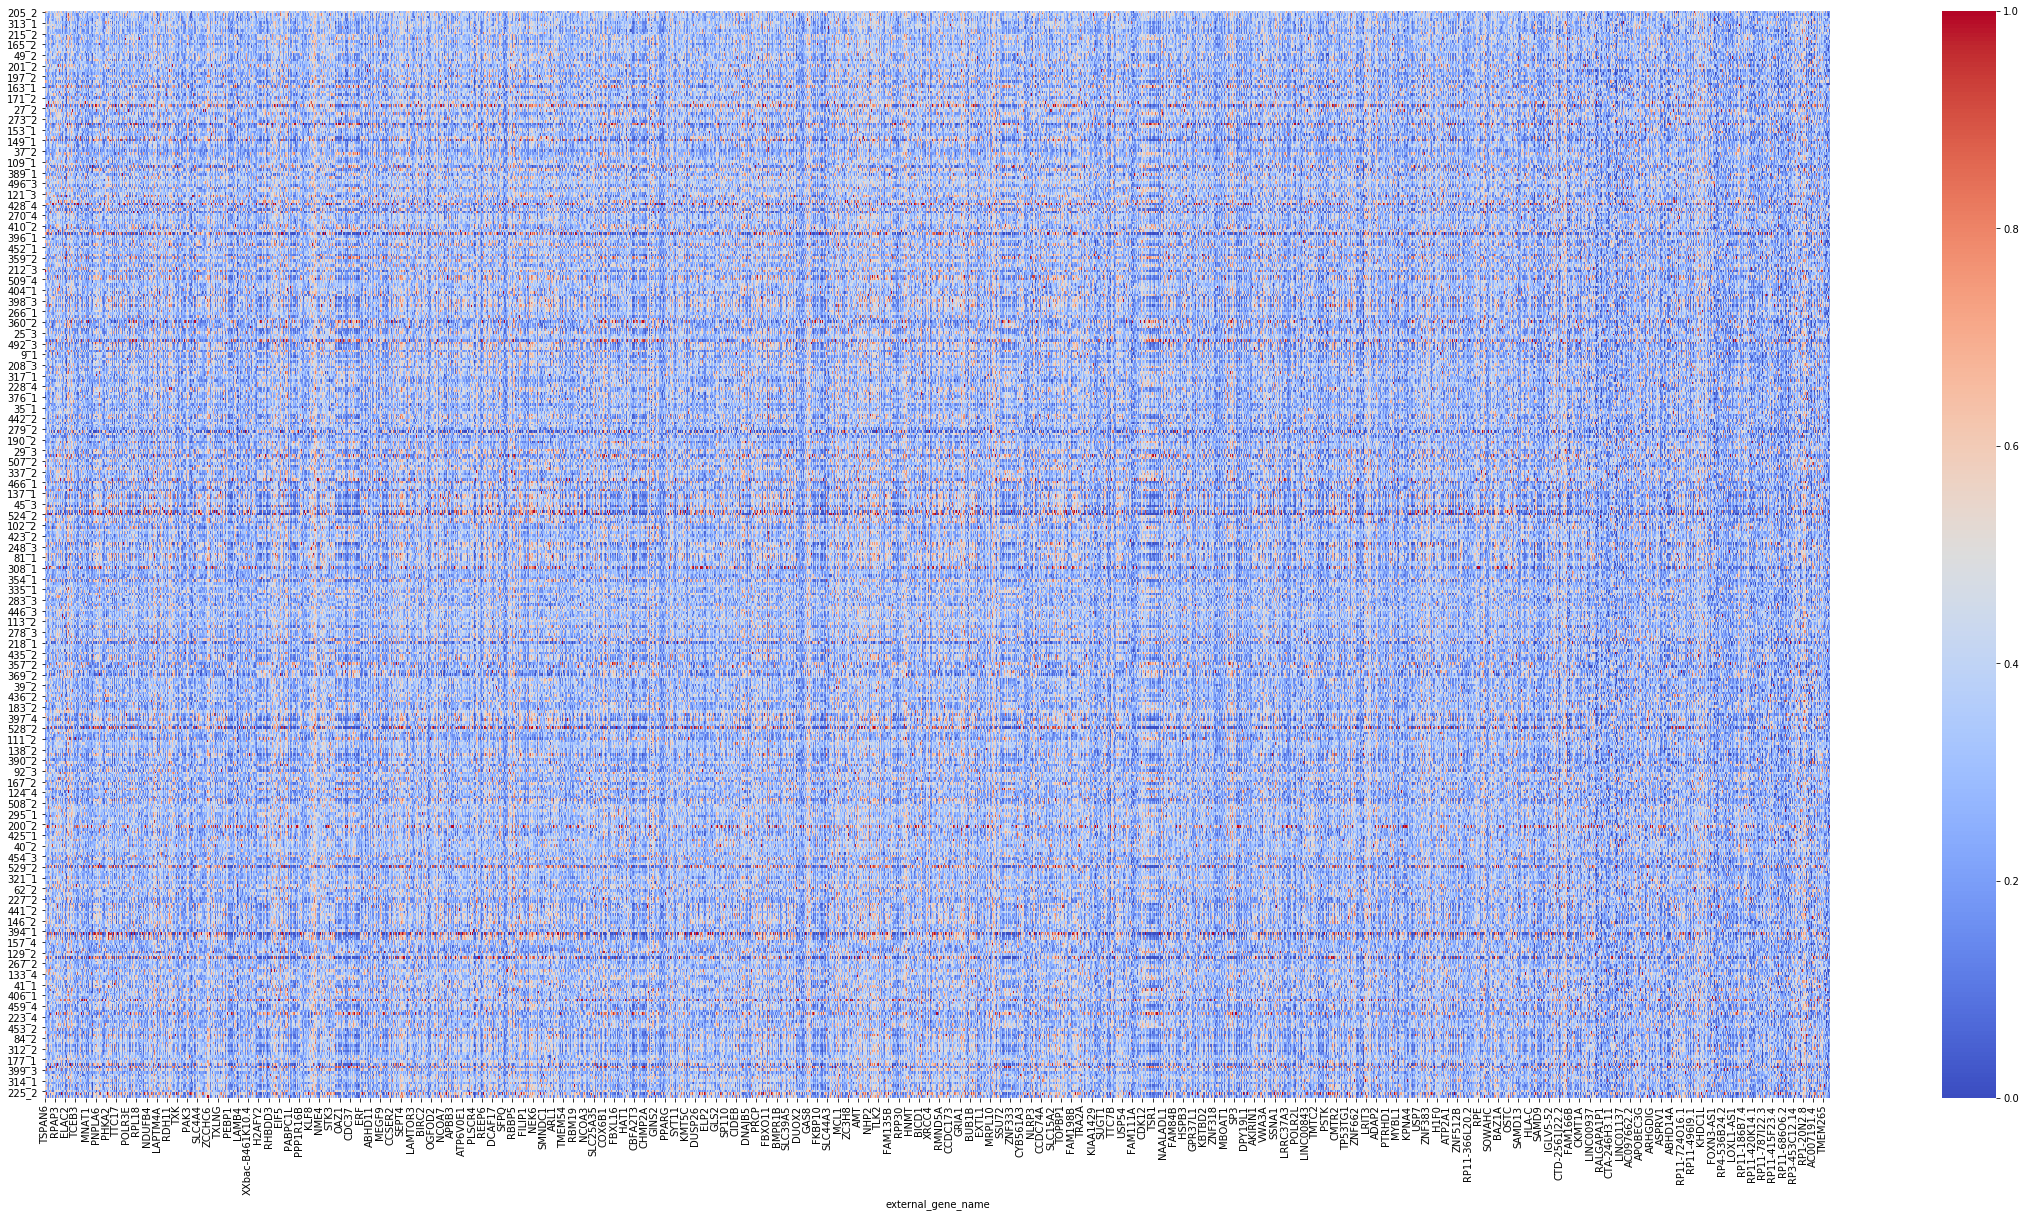

In [383]:
#seems meaningless 
plt.figure(figsize=(40,20 ))
fig = sns.heatmap(test, cmap='coolwarm', linecolor='black')
 

Text(0.5, 0.98, 'Gene_patient_Clusterheatmap')

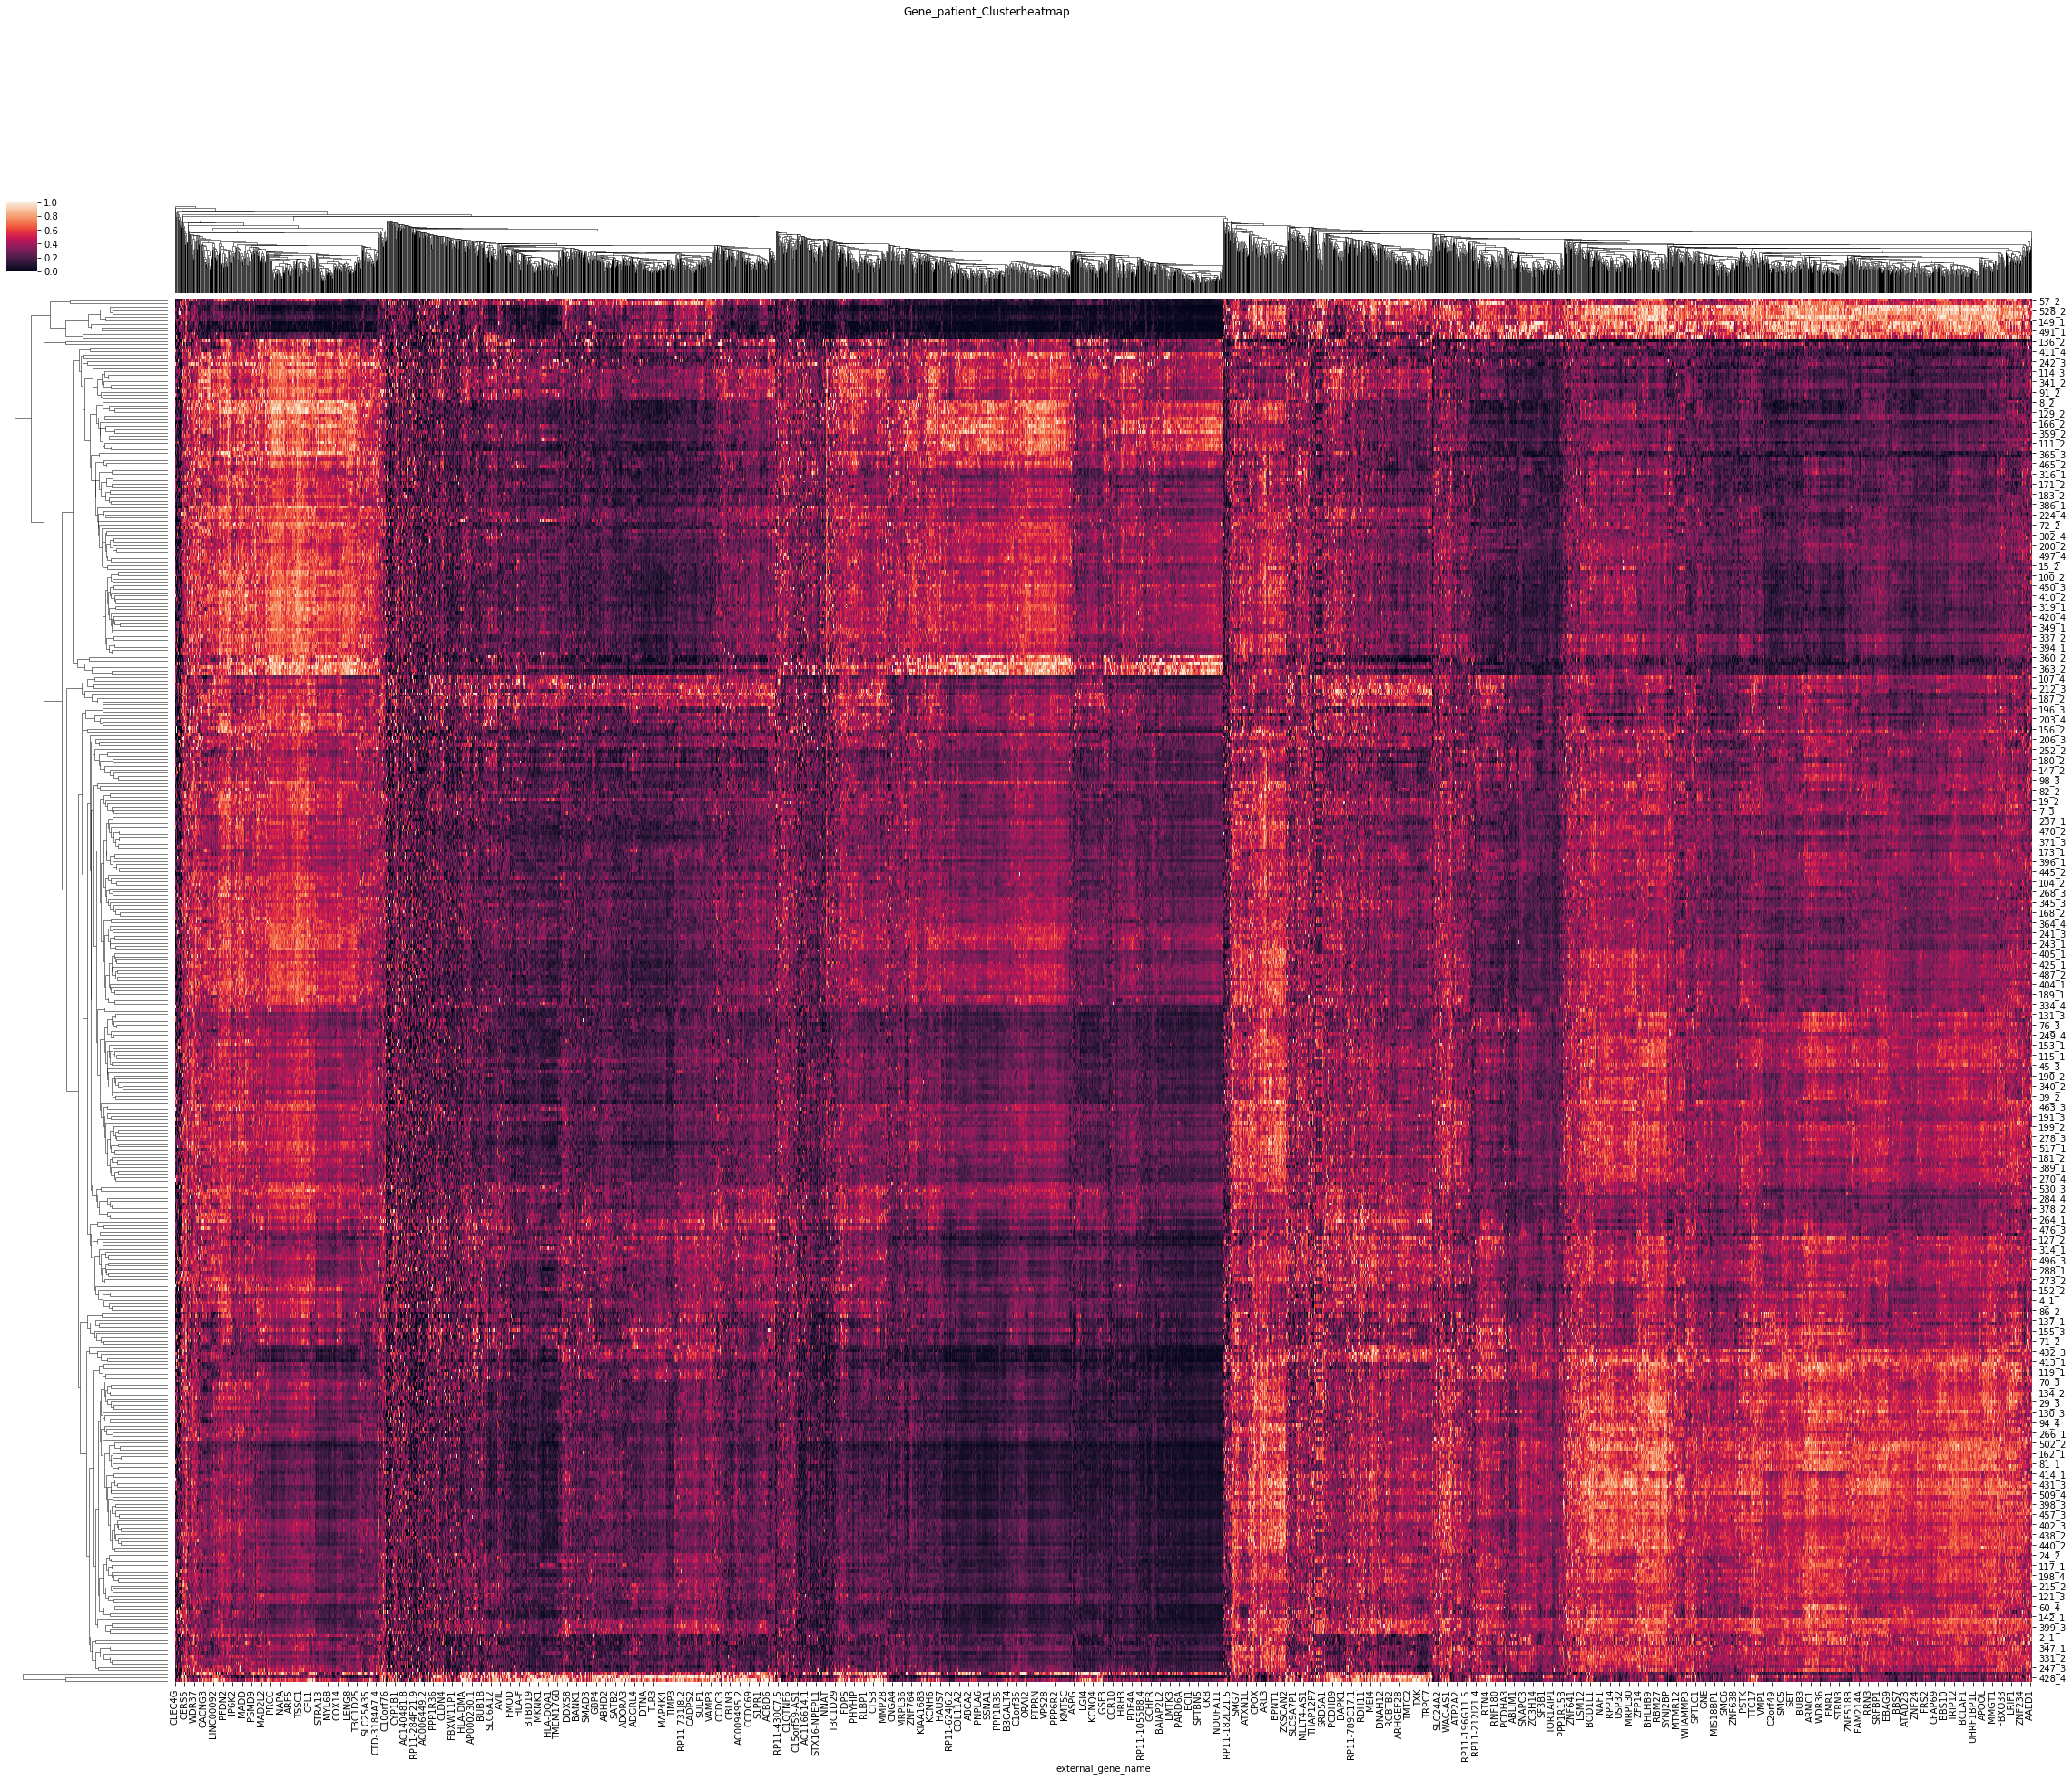

In [384]:
#althought did not show very clear cluster, at some cluster, there are no of stage 4 patients
g = sns.clustermap(test,figsize = (40,30))
g.fig.suptitle('Gene_patient_Clusterheatmap')

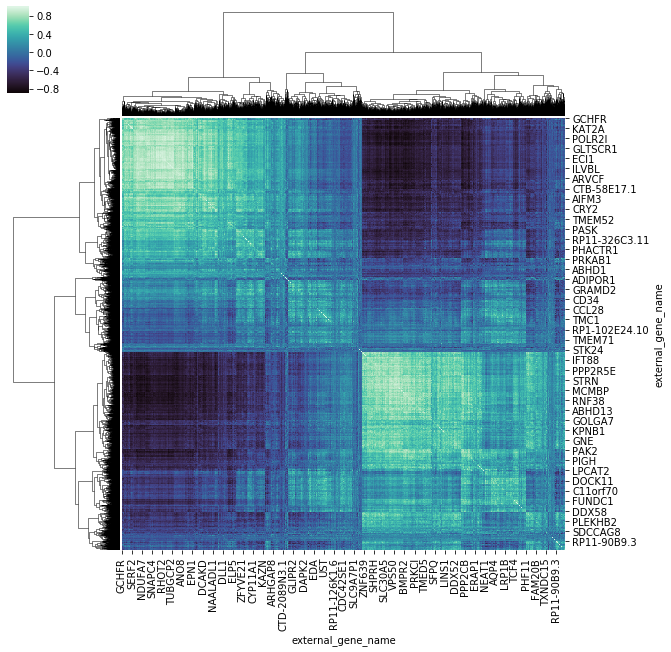

In [403]:
#correlation, might help for variable selection, since some genes might be have similiar effect, could help reduce dimension
corr = test.corr()
sns.clustermap(corr,cmap="mako")

# Filtered low variance dataset-get ths.shape (3690,407)

In [386]:
#filter NaN, get 3690
ths = ths.dropna(axis=0,how='any')
ths.shape

(3690, 1)

In [387]:
test.shape

(407, 3690)

# crate dataset

In [393]:
#create dataset for modeling
data = test
data.head()

external_gene_name MGS_LEVEL    TSPAN6     FUCA2      GCLC    SEMA3F  \
205_2                      2  0.413827  0.374748  0.692236  0.364232   
251_1                      1  0.236678  0.227783  0.243099  0.393270   
474_3                      3  0.187834  0.153301  0.279470  0.455109   
178_4                      4  0.105215  0.099118  0.202273  0.345651   
313_1                      1  0.261500  0.176303  0.287437  0.137330   

external_gene_name    ANKIB1       BAD      CD99    MAD1L1  TMEM176A  ...  \
205_2               0.616166  0.230769  0.535113  0.454147  0.315069  ...   
251_1               0.343130  0.262310  0.337588  0.514919  0.201911  ...   
474_3               0.330394  0.282329  0.174306  0.406849  0.161702  ...   
178_4               0.414352  0.157432  0.184713  0.377494  0.099135  ...   
313_1               0.541634  0.081213  0.153164  0.194455  0.206654  ...   

external_gene_name  PCBP2-OT1  RP11-557N21.1  CTC-325H20.8  CTD-2021K4.1  \
205_2                0.342184       0.142460      0.222006      0.611190   
251_1                0.154700       0.188546      0.293826      0.307780   
474_3                0.199962       0.375112      0.328818      0.532773   
178_4                0.192456       0.078291      0.396525      0.190392   
313_1                0.126085       0.299956      0.350583      0.250570   

external_gene_name  RP11-681B3.4  RP11-118G23.3  RP11-624J6.2  RP11-9J18.1  \
205_2                   0.658467       0.148492      0.205038     0.139876   
251_1                   0.476310       0.147397      0.266822     0.000000   
474_3                   0.397823       0.366557      0.388154     0.121169   
178_4                   0.357346       0.122410      0.468692     0.283670   
313_1                   0.607989       0.312656      0.121023     0.337880   

external_gene_name  RP11-793J2.1  RP11-419I17.1  
205_2                   0.371926       0.175608  
251_1                   0.276888       0.172579  
474_3                   0.330521       0.161044  
178_4                   0.275939       0.428593  
313_1                   0.626487       0.160516  

[5 rows x 3691 columns]

In [394]:
data.to_csv("./3690_all.tsv",sep = '\t')

# TSNE

In [ ]:
#dnt show clear cluster, make sense since difference between genes are small

In [395]:
ftest.head()

205_2     251_1     474_3     178_4     313_1  \
external_gene_name                                                     
TSPAN6              0.413827  0.236678  0.187834  0.105215  0.261500   
FUCA2               0.374748  0.227783  0.153301  0.099118  0.176303   
GCLC                0.692236  0.243099  0.279470  0.202273  0.287437   
SEMA3F              0.364232  0.393270  0.455109  0.345651  0.137330   
ANKIB1              0.616166  0.343130  0.330394  0.414352  0.541634   

                       484_4     288_1     106_4     215_2     184_3  ...  \
external_gene_name                                                    ...   
TSPAN6              0.461884  0.316355  0.173581  0.355161  0.130093  ...   
FUCA2               0.291843  0.311145  0.104540  0.265650  0.220032  ...   
GCLC                0.496983  0.396294  0.501865  0.478165  0.131817  ...   
SEMA3F              0.204695  0.148411  0.188919  0.177785  0.428249  ...   
ANKIB1              0.498680  0.520653  0.447199  0.568739  0.276046  ...   

                       225_2     150_4     289_2    pvalue  chromosome_name  \
external_gene_name                                                            
TSPAN6              0.254767  0.796152  0.134380  0.000030                X   
FUCA2               0.144486  0.561727  0.172696  0.000449                6   
GCLC                0.201419  0.619380  0.219659  0.010790                6   
SEMA3F              0.416522  0.056705  0.190838  0.032070                3   
ANKIB1              0.198606  0.972479  0.648014  0.038787                7   

                    start_position  end_position  strand  gene_length  \
external_gene_name                                                      
TSPAN6                   100627109     100639991      -1       4535.0   
FUCA2                    143494811     143511690      -1       2793.0   
GCLC                      53497341      53616970      -1       8463.0   
SEMA3F                    50155045      50189075       1       4826.0   
ANKIB1                    92246234      92401384       1       7130.0   

                      gene_biotype  
external_gene_name                  
TSPAN6              protein_coding  
FUCA2               protein_coding  
GCLC                protein_coding  
SEMA3F              protein_coding  
ANKIB1              protein_coding  

[5 rows x 414 columns]

In [396]:
retina = pd.read_csv('meta_retina.csv', index_col = [0])
retina.shape # 523

(523, 40)

In [397]:
sub_retina = pd.DataFrame(retina,columns = ['age','sex','mgs_level'])
sub_retina.head()

age sex mgs_level
r_id                    
1_2   61.0   M         2
2_1   77.0   F         1
3_1   81.0   F         1
4_1   88.0   F         1
5_1   75.0   F         1

In [398]:
ftest = sub_retina.join(ftest.T)
ftest.head()

age sex mgs_level    TSPAN6     FUCA2      GCLC    SEMA3F    ANKIB1  \
r_id                                                                         
1_2   61.0   M         2       NaN       NaN       NaN       NaN       NaN   
2_1   77.0   F         1     0.108  0.223677  0.490123  0.319075  0.570907   
3_1   81.0   F         1       NaN       NaN       NaN       NaN       NaN   
4_1   88.0   F         1  0.359576  0.254709   0.23023  0.252982  0.387212   
5_1   75.0   F         1       NaN       NaN       NaN       NaN       NaN   

           BAD     CD99  ... PCBP2-OT1 RP11-557N21.1 CTC-325H20.8  \
r_id                     ...                                        
1_2        NaN      NaN  ...       NaN           NaN          NaN   
2_1   0.150967  0.10332  ...  0.216273     0.0549328     0.342424   
3_1        NaN      NaN  ...       NaN           NaN          NaN   
4_1   0.128429  0.23257  ...  0.173627      0.261451      0.25465   
5_1        NaN      NaN  ...       NaN           NaN          NaN   

     CTD-2021K4.1 RP11-681B3.4 RP11-118G23.3 RP11-624J6.2 RP11-9J18.1  \
r_id                                                                    
1_2           NaN          NaN           NaN          NaN         NaN   
2_1      0.278713     0.692026      0.085888     0.188749    0.236262   
3_1           NaN          NaN           NaN          NaN         NaN   
4_1     0.0350332     0.642669      0.102195    0.0837125    0.303563   
5_1           NaN          NaN           NaN          NaN         NaN   

     RP11-793J2.1 RP11-419I17.1  
r_id                             
1_2           NaN           NaN  
2_1      0.344197      0.293047  
3_1           NaN           NaN  
4_1      0.435147      0.228151  
5_1           NaN           NaN  

[5 rows x 3693 columns]

In [399]:
fclean = ftest.dropna(axis=0,how='any')
fclean.shape #407

(407, 3693)

In [400]:
Y = TSNE(n_components = 2).fit_transform(fclean.drop(['age','sex','mgs_level'],axis=1))
fclean['tsne-2d-one'] = Y[:,0]
fclean['tsne-2d-two'] = Y[:,1]
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


age sex mgs_level     TSPAN6     FUCA2      GCLC    SEMA3F    ANKIB1  \
r_id                                                                          
2_1   77.0   F         1      0.108  0.223677  0.490123  0.319075  0.570907   
4_1   88.0   F         1   0.359576  0.254709   0.23023  0.252982  0.387212   
6_1   73.0   F         1  0.0884949  0.121138  0.266438  0.314963  0.299041   
7_3   89.0   F         3   0.251157  0.274717  0.162877  0.232971  0.374048   
8_2   72.0   F         2   0.113515  0.119594  0.123002  0.459596  0.186373   

           BAD      CD99  ... CTC-325H20.8 CTD-2021K4.1 RP11-681B3.4  \
r_id                      ...                                          
2_1   0.150967   0.10332  ...     0.342424     0.278713     0.692026   
4_1   0.128429   0.23257  ...      0.25465    0.0350332     0.642669   
6_1    0.21659  0.137582  ...     0.401077     0.274543     0.147955   
7_3   0.218845  0.223741  ...     0.387404    0.0948759     0.289801   
8_2   0.388184  0.259491  ...     0.531103            0     0.236214   

     RP11-118G23.3 RP11-624J6.2 RP11-9J18.1 RP11-793J2.1 RP11-419I17.1  \
r_id                                                                     
2_1       0.085888     0.188749    0.236262     0.344197      0.293047   
4_1       0.102195    0.0837125    0.303563     0.435147      0.228151   
6_1       0.178844     0.310423    0.259419     0.156782      0.202058   
7_3       0.239188     0.262685           0     0.299546      0.150896   
8_2       0.228365     0.465582    0.426712     0.209728      0.127987   

     tsne-2d-one tsne-2d-two  
r_id                          
2_1    -4.359101    0.161163  
4_1    -3.365160   -6.827980  
6_1    -2.047897   -2.918528  
7_3    -0.191820   -4.753979  
8_2    15.105149  -13.024544  

[5 rows x 3695 columns]

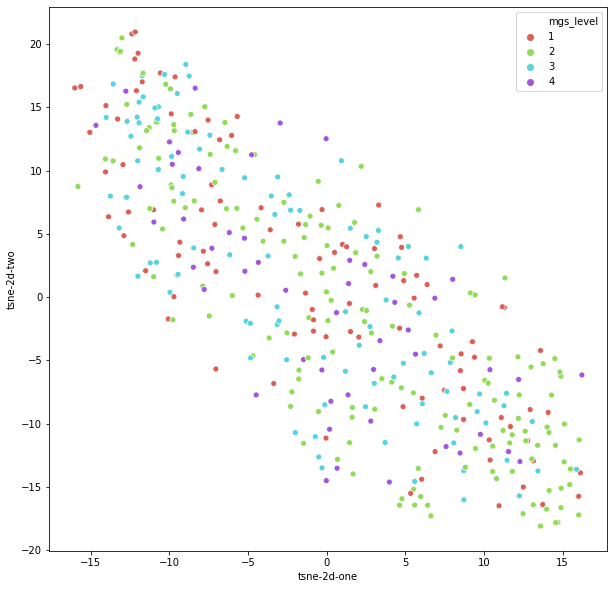

In [401]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls",4),
    data = fclean
)
fig.figure.savefig("label mgs_level.png",dpi = 300)

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


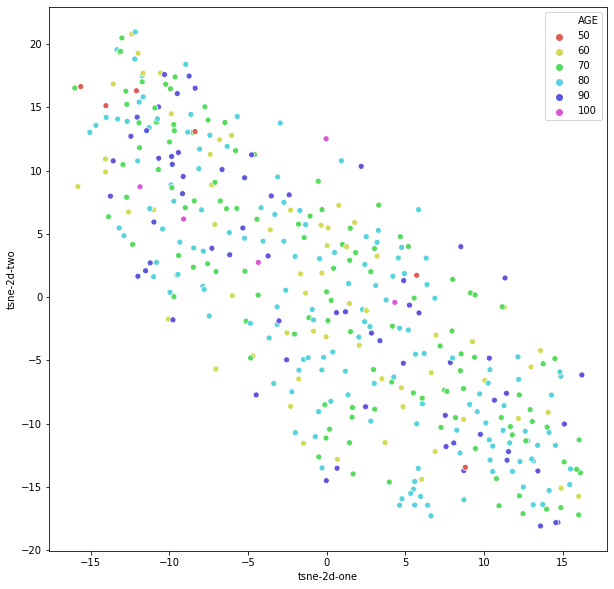

In [402]:
from math import floor, ceil
fclean['AGE'] = 0
fclean['AGE'] = fclean['age'].map(lambda x: floor(x/10) * 10)
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "AGE",
    palette = sns.color_palette("hls", 6),
    data = fclean
)
fig.figure.savefig("age.png",dpi = 300)